# examine $\theta_{\rm cosmo}, \theta_{\rm g}, X_i$ 
from CAMELS-TNG

In [2]:
import os
import h5py 
import numpy as np

In [1]:
import corner as DFM

In [3]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
f = h5py.File('/Users/chahah/data/cgpop/tng.snap33.subfind.galaxies.LHC.hdf5', 'r')
props = f['props'][...].T
f.close()

In [5]:
props[:,6] = np.log10(props[:,6])
props[:,7] = np.log10(props[:,7])
props[:,13] = np.log10(props[:,13])
props[:,17] = np.log10(props[:,17])

/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


## temporarily remove galaxies with no $M_{\rm gas}$

In [18]:
props = props[np.isfinite(props[:,6])]

In [23]:
# Om, s8, Asn1, Aagn1, Asn2, Aagn2, Mg, Mstar, Mbh, Mtot, Vmax, Vdisp, Zg, Zs, SFR, J, Vel, Rstar, Rtot, Rvmax,
# absmag U, B, V, K, g, r, i, z
lbls = [r'$\Omega_m$', r'$\sigma_8$', r'$A_{\rm SN1}$', r'$A_{\rm AGN1}$', r'$A_{\rm SN2}$', r'$A_{\rm AGN2}$', 
        r'$\log M_g$', r'$\log M_*$', r'$M_{\rm BH}$', r'$M_{\rm tot}$', r'$V_{\rm max}$', r'$V_{\rm disp}$', 
        r'$Z_g$', r'$\log Z_*$', 'SFR', 'J', 'V', r'$\log R_*$', r'$R_{\rm tot}$', r'$R_{\rm vmax}$', 
        r'$U$ absmag', r'$B$ absmag', r'$V$ absmag', r'$K$ absmag', r'$g$ absmag', r'$r$ absmag', r'$i$ absmag', 
        r'$z$ absmag']

In [8]:
icosmo = [0, 1, 2, 3, 4, 5] # cosmological/hydro parameters
igals = [6, 7, 10, 13, 17] # intrinsic properties of galaixes (Mg, M*, Vmax, Z*, R*)
iobs = [-4, -3, -2, -1]

# joint distribution $p(\theta_{\rm cosmo}, \theta_{\rm g}, X_i)$ 

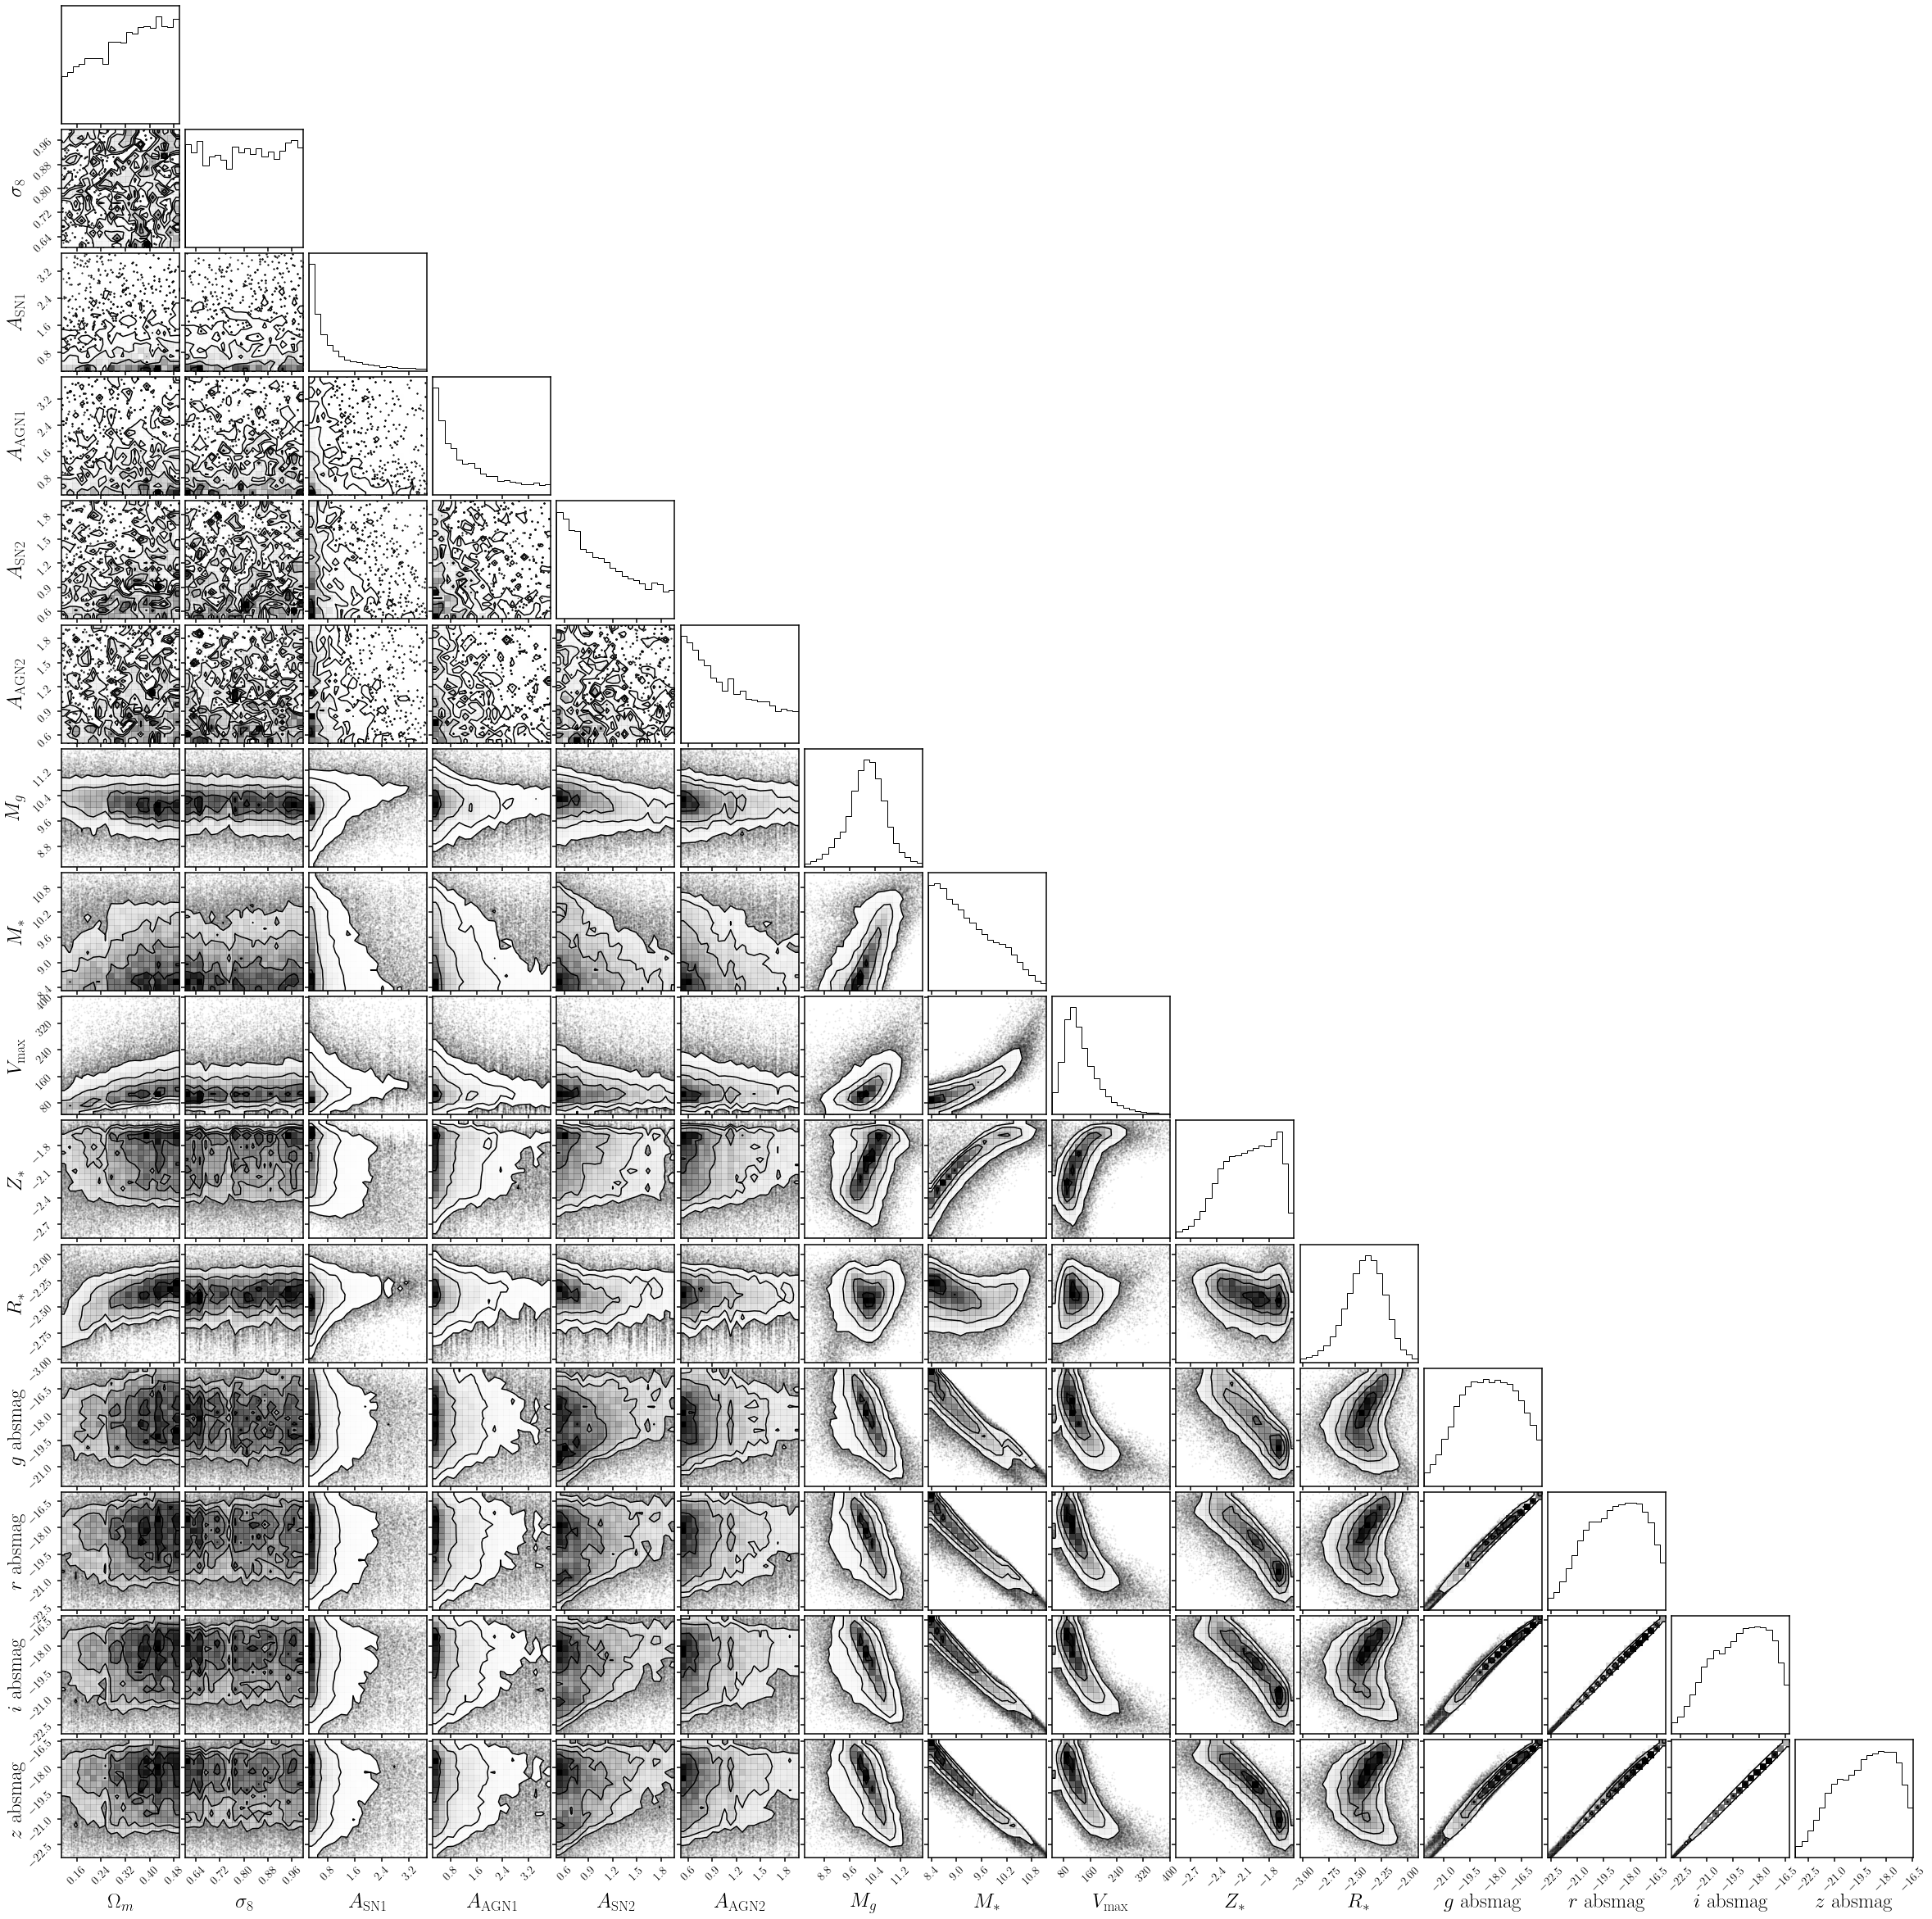

In [20]:
icols = np.array(icosmo + igals + iobs)
fig = DFM.corner(props[::10, icols], 
                 labels=np.array(lbls)[icols], 
                 range=[(np.quantile(col, [0.01])[0], np.quantile(col, [0.99])[0]) for col in props[:,icols].T],
                 label_kwargs={'fontsize': 25})

# $p(\theta_{\rm g}, X_i)$

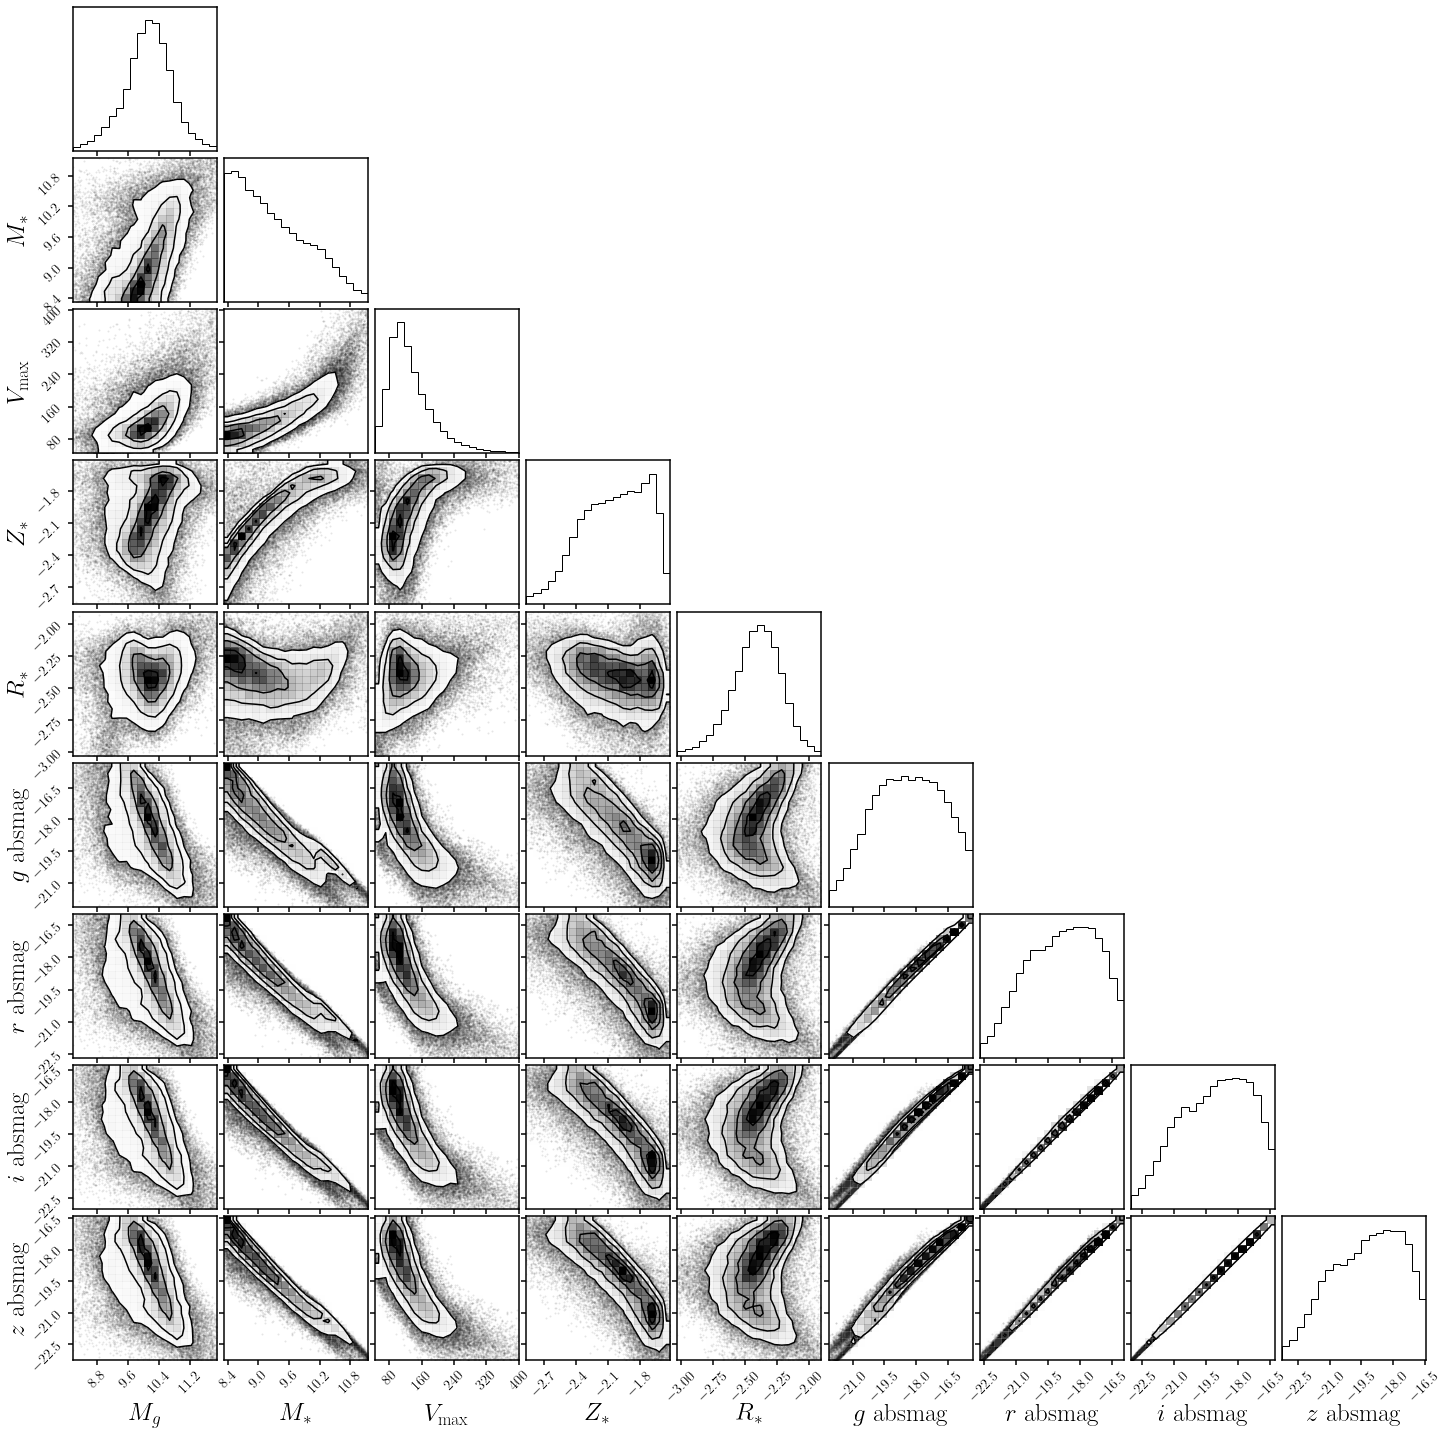

In [21]:
icols = np.array(igals + iobs)
fig = DFM.corner(props[::10, icols], 
                 labels=np.array(lbls)[icols], 
                 range=[(np.quantile(col, [0.01])[0], np.quantile(col, [0.99])[0]) for col in props[:,icols].T],
                 label_kwargs={'fontsize': 25})

# $p(\theta_{\rm cosmo}, \theta_{\rm g})$

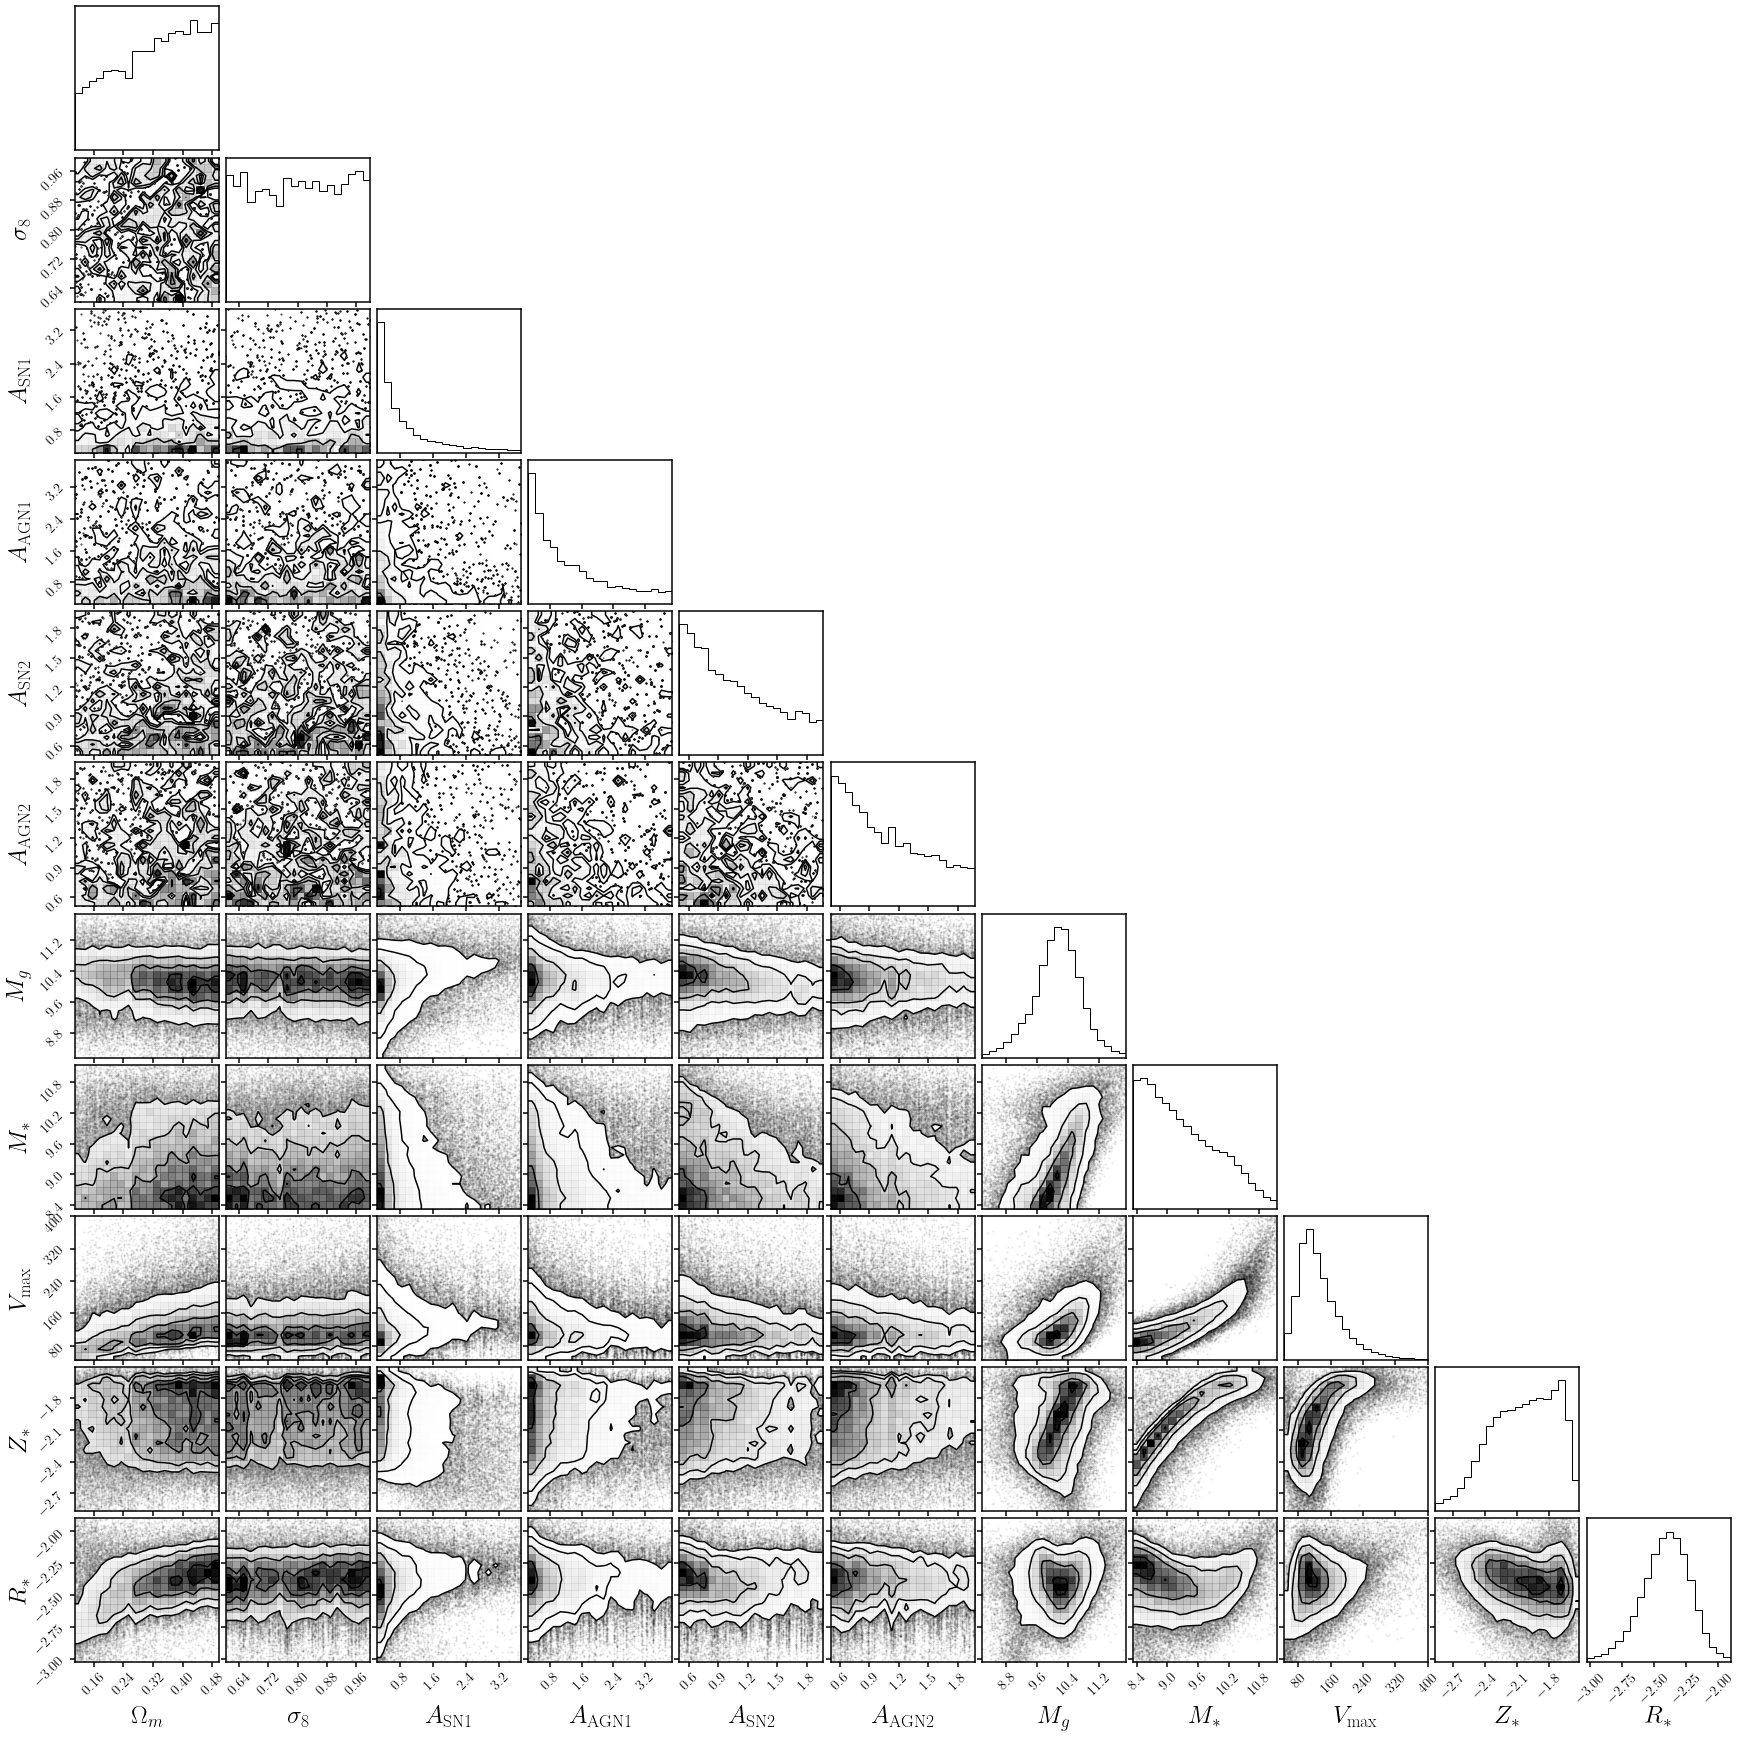

In [22]:
icols = np.array(icosmo + igals)
fig = DFM.corner(props[::10, icols], 
                 labels=np.array(lbls)[icols], 
                 range=[(np.quantile(col, [0.01])[0], np.quantile(col, [0.99])[0]) for col in props[:,icols].T],
                 label_kwargs={'fontsize': 25})